In [1]:
# Step 1: Install Required Packages
!pip install ultralytics
!pip install opencv-python-headless
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# Step 2: Import Required Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Step 3: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Step 4: Define Dataset Paths
train_images = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/images/"
train_labels = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/labels/"
test_images = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/"
test_labels = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/labels/"
valid_images = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/images/"
valid_labels = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/labels/"

In [5]:
# Step 5: Verify Dataset Structure
!ls $train_images
!ls $train_labels
!ls $test_images
!ls $test_labels
!ls $valid_images
!ls $valid_labels

0001_png.rf.21f72dac0d774a0d53d837570d473c21.jpg  0431_png.rf.5a883a9106cfeebf96d12f3eb742b9c2.jpg
0004_png.rf.ba08f5e4bbef317650514050c09211b4.jpg  0433_png.rf.80bd14965150b2b165496b6661f05331.jpg
0005_png.rf.1e4f71e9dc0dec4cebcac0d60ff0c324.jpg  0434_png.rf.ac82563930a9dd90942d1dff24535062.jpg
0007_png.rf.ec558420d79b87792109b4c22c676a37.jpg  0435_png.rf.2083f846cd76921ff57999e7d0079001.jpg
0008_png.rf.a3db4b732327a31137d229733f6cbde2.jpg  0436_png.rf.821e9aefe065afbafbc6aed161996ad0.jpg
0009_png.rf.31436fbc19956090d6e8591f953d6353.jpg  0438_png.rf.1e4749523753bcec9b103b83e4a56e07.jpg
0010_png.rf.bc513b13adc699bbc098b9c21a9ff68b.jpg  0442_png.rf.11a2f40ee99ee5091b6a36dbfb7e5e84.jpg
0011_png.rf.69ce34d8e3f9665fd595f673249f8ba9.jpg  0443_png.rf.b5f16ec784bd2ab58e67ae27e8f93b61.jpg
0012_png.rf.dbf63e62f3d60117b38dadbfc7c33300.jpg  0444_png.rf.60d5ed0fea3104ca5b6808c9127b4b54.jpg
0015_png.rf.cc8995c8e57170d4af55344ec97ea08e.jpg  0445_png.rf.11d658e91deaec15b8e41b34599becad.jpg
0016_png.r

In [6]:
import os

base_path = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer"  # Adjust this base path if needed
print("Train Images:", os.path.abspath(os.path.join(base_path, "train/images")))
print("Validation Images:", os.path.abspath(os.path.join(base_path, "valid/images")))
print("Test Images:", os.path.abspath(os.path.join(base_path, "test/images")))


Train Images: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/images
Validation Images: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/images
Test Images: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images


In [7]:
yaml_content = """
train: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/images
val: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/images
test: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images

nc: 1
names: ['wound']

roboflow:
  workspace: instance-segmentation-using-yolo-v8-of-foot-ulcer-gyx2l
  project: instance-segmentation-of-ulcer-g8fid
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/instance-segmentation-using-yolo-v8-of-foot-ulcer-gyx2l/instance-segmentation-of-ulcer-g8fid/dataset/1
"""

# Path to save the YAML file
yaml_path = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/data.yaml"

# Write the YAML content to the file
with open(yaml_path, 'w') as file:
    file.write(yaml_content)

print(f"YAML file saved to: {yaml_path}")


YAML file saved to: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/data.yaml


In [8]:
import yaml

# Path to your YAML file
yaml_path = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/data.yaml"

# Load and validate the YAML file
try:
    with open(yaml_path, 'r') as file:
        data = yaml.safe_load(file)
    print("YAML file is valid and loaded successfully.")
    print(data)  # Optional: Print the content to verify
except yaml.YAMLError as e:
    print("YAML syntax error:", e)


YAML file is valid and loaded successfully.
{'train': '/content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/images', 'val': '/content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/images', 'test': '/content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images', 'nc': 1, 'names': ['wound'], 'roboflow': {'workspace': 'instance-segmentation-using-yolo-v8-of-foot-ulcer-gyx2l', 'project': 'instance-segmentation-of-ulcer-g8fid', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/instance-segmentation-using-yolo-v8-of-foot-ulcer-gyx2l/instance-segmentation-of-ulcer-g8fid/dataset/1'}}


In [9]:
# Step 7: Train the YOLOv8 Model

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model using the YAML file
model.train(data=yaml_path, epochs=50, imgsz=640, batch=16, device=0)

100%|██████████| 6.25M/6.25M [00:00<00:00, 78.5MB/s]


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Instance_Segmentation_of_ulcer/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Instance_Segmentation_of_ulcer/train/labels.cache... 582 images, 1 backgrounds, 0 corrupt: 100%|██████████| 582/582 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/labels.cache... 166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.01G      1.315      2.945       1.22          5        640: 100%|██████████| 37/37 [01:09<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        166        218    0.00363       0.83      0.104     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.49G      1.266      1.992      1.162         12        640: 100%|██████████| 37/37 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        166        218      0.896      0.252      0.401      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.51G      1.291      1.868      1.202          8        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        166        218      0.657      0.509      0.557      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.51G      1.356      1.649      1.232         12        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        166        218      0.675      0.582      0.665      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.54G      1.279      1.427      1.201         13        640: 100%|██████████| 37/37 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        166        218      0.748      0.697      0.726      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.55G      1.263      1.314      1.209         15        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]


                   all        166        218       0.72      0.688       0.72       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.56G      1.243      1.204      1.188          6        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]


                   all        166        218      0.722      0.638      0.706      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.58G      1.264      1.177      1.205         16        640: 100%|██████████| 37/37 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]


                   all        166        218      0.778      0.756      0.809      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.6G      1.215      1.116      1.184         15        640: 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        166        218      0.731      0.734      0.771       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.6G      1.185      1.082      1.168         11        640: 100%|██████████| 37/37 [00:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        166        218      0.869      0.716      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.6G      1.187      1.007      1.175         10        640: 100%|██████████| 37/37 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        166        218      0.749        0.7      0.768      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.6G      1.203     0.9863      1.152         13        640: 100%|██████████| 37/37 [00:12<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        166        218      0.807      0.788      0.838      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.6G      1.115     0.9544      1.145          8        640: 100%|██████████| 37/37 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        166        218      0.771      0.693      0.754      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.6G      1.146     0.9277      1.142         12        640: 100%|██████████| 37/37 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]


                   all        166        218      0.833      0.803      0.855      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.6G      1.145     0.9279      1.127         14        640: 100%|██████████| 37/37 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]

                   all        166        218      0.813      0.739      0.817      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.6G       1.13      0.907      1.144         11        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        166        218      0.735      0.849      0.845      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.6G      1.053     0.8597       1.09         10        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all        166        218      0.806      0.798      0.845      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.6G        1.1     0.8383        1.1          9        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        166        218      0.812      0.826      0.852      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.6G      1.086       0.83      1.107          9        640: 100%|██████████| 37/37 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        166        218      0.854      0.805      0.871      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.6G      1.056     0.8231      1.114         14        640: 100%|██████████| 37/37 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        166        218       0.82      0.821      0.852      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.6G       1.05     0.7914       1.08         19        640: 100%|██████████| 37/37 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]


                   all        166        218      0.834      0.771       0.85       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.6G      1.049     0.8077      1.094         16        640: 100%|██████████| 37/37 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        166        218      0.853      0.825      0.876      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.6G      1.044     0.7917      1.091         12        640: 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        166        218      0.772      0.826      0.847      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.6G      1.101     0.7961      1.099         14        640: 100%|██████████| 37/37 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        166        218      0.836      0.821      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.6G      1.029     0.7667      1.077          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        166        218      0.754      0.748      0.798      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.6G     0.9837      0.718      1.048         16        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        166        218      0.818      0.853      0.884       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.6G     0.9699     0.7255      1.058         19        640: 100%|██████████| 37/37 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        166        218      0.874      0.793      0.857      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.6G      1.039     0.7215      1.072          8        640: 100%|██████████| 37/37 [00:12<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        166        218      0.837      0.823       0.88      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.6G     0.9372     0.6933      1.042         16        640: 100%|██████████| 37/37 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        166        218      0.877      0.784      0.879       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.6G     0.9433     0.6891      1.032         16        640: 100%|██████████| 37/37 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        166        218      0.894      0.813      0.882      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.6G     0.9621     0.6714      1.052         15        640: 100%|██████████| 37/37 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        166        218      0.838      0.835      0.885      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.6G     0.9483     0.6914      1.053         17        640: 100%|██████████| 37/37 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        166        218      0.887      0.798      0.889      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.6G     0.9536     0.6693      1.051         10        640: 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        166        218      0.891      0.812      0.895      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.6G     0.9101     0.6633       1.03         11        640: 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        166        218      0.854      0.839      0.886      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.6G      0.901     0.6558      1.018          8        640: 100%|██████████| 37/37 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]


                   all        166        218      0.852      0.845      0.901      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.6G     0.8844     0.6362      1.014         12        640: 100%|██████████| 37/37 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166        218      0.854      0.807      0.867      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.6G     0.9214     0.6485      1.034         10        640: 100%|██████████| 37/37 [00:12<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        166        218      0.847       0.83      0.883      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.6G     0.8784      0.611      1.029         12        640: 100%|██████████| 37/37 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        166        218      0.855       0.84      0.891      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.6G     0.8999     0.6161      1.007          9        640: 100%|██████████| 37/37 [00:12<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        166        218      0.889      0.858      0.911      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.61G     0.8643     0.5954     0.9921         11        640: 100%|██████████| 37/37 [00:12<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]

                   all        166        218      0.874      0.857      0.921      0.656


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.61G     0.8355     0.5801      1.006          6        640: 100%|██████████| 37/37 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

                   all        166        218      0.893      0.807      0.895      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.61G     0.8224     0.5661      1.012          8        640: 100%|██████████| 37/37 [00:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        166        218      0.867      0.807      0.878       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.61G     0.8047     0.5292     0.9847          9        640: 100%|██████████| 37/37 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        166        218      0.859       0.84      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.61G      0.791     0.5195     0.9941          6        640: 100%|██████████| 37/37 [00:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        166        218      0.872      0.872      0.901      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.61G     0.7787     0.5117     0.9803          8        640: 100%|██████████| 37/37 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        166        218      0.874      0.867        0.9      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.61G     0.8058     0.5092     0.9921          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        166        218        0.9      0.826      0.903      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.61G     0.7514     0.4878      0.946          7        640: 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

                   all        166        218      0.875      0.863      0.911      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.61G     0.7468     0.4801     0.9737          8        640: 100%|██████████| 37/37 [00:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]


                   all        166        218      0.868      0.871      0.907      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.61G     0.7335     0.4605     0.9592          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        166        218      0.904       0.83      0.906      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.61G     0.7379     0.4696     0.9706          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        166        218      0.894      0.839      0.908      0.662



50 epochs completed in 0.231 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


                   all        166        218      0.867      0.872      0.907      0.663
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff703b994d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
import os

# Check all subfolders in the runs/segment directory
segment_path = "runs/segment"
if os.path.exists(segment_path):
    print("Available experiment folders:")
    print(os.listdir(segment_path))
else:
    print("Training folder not found. Did you train the model yet?")


Training folder not found. Did you train the model yet?


In [12]:
import shutil
import os

# Set your Drive folder path
drive_path = "/content/drive/MyDrive/yolov8detection"
os.makedirs(drive_path, exist_ok=True)

# Copy trained model to Drive
shutil.copy("runs/detect/train/weights/best.pt", f"{drive_path}/yolov8_detection_model.pt")


'/content/drive/MyDrive/yolov8detection/yolov8_detection_model.pt'

In [14]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/yolov8detection/yolov8_detection_model.pt")


In [18]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Run detection
results = model(image_path)

# Save the output image
results[0].save(filename="detected_output.jpg")


Saving Screenshot 2025-04-07 010803.png to Screenshot 2025-04-07 010803 (1).png

image 1/1 /content/Screenshot 2025-04-07 010803 (1).png: 640x512 1 wound, 40.6ms
Speed: 2.8ms preprocess, 40.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


'detected_output.jpg'

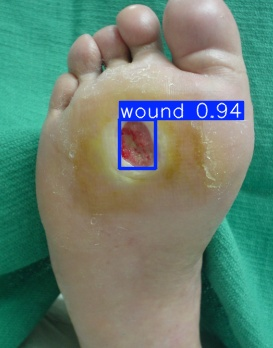

In [19]:
from IPython.display import Image, display
display(Image("detected_output.jpg"))


In [ ]:
# Step 8: Evaluate Model Performance
model.val()# Step 8: Evaluate the model
print("\nEvaluating the model...")
val_results = model.val()
print(f"mAP50-95: {val_results.box.map}")
print(f"mAP50: {val_results.box.map50}")
print(f"Precision: {val_results.box.p}")
print(f"Recall: {val_results.box.r}")



Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/labels.cache... 166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]


                   all        166        218      0.857      0.881      0.908      0.662
Speed: 4.5ms preprocess, 4.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train6

Evaluating the model...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/Instance_Segmentation_of_ulcer/valid/labels.cache... 166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


                   all        166        218      0.857      0.881      0.908      0.662
Speed: 5.1ms preprocess, 7.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train7
mAP50-95: 0.6622885987581391
mAP50: 0.9083404670270692
Precision: [    0.85722]
Recall: [    0.88131]


In [ ]:
# Step 9: Test the model on test set
print("\nTesting model on test set...")
test_results = model.val(data=yaml_path, split='test')
print(f"Test Results:")
print(f"mAP50-95: {test_results.box.map}")
print(f"mAP50: {test_results.box.map50}")
print(f"Precision: {test_results.box.p}")
print(f"Recall: {test_results.box.r}")



Testing model on test set...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/labels... 84 images, 0 backgrounds, 1 corrupt: 100%|██████████| 85/85 [00:39<00:00,  2.13it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/sample.jpg: ignoring corrupt image/label: [Errno 21] Is a directory: '/content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/sample.jpg'
val: New cache created: /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]


                   all         84        112      0.881      0.866      0.898      0.636
Speed: 8.8ms preprocess, 5.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train8
Test Results:
mAP50-95: 0.6357729199214677
mAP50: 0.898092569600451
Precision: [    0.88097]
Recall: [    0.86607]



Visualizing predictions on sample test images...

image 1/1 /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/0539_png.rf.554965dfcc6a0eb86454f0bdfd6eb86e.jpg: 640x640 1 wound, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


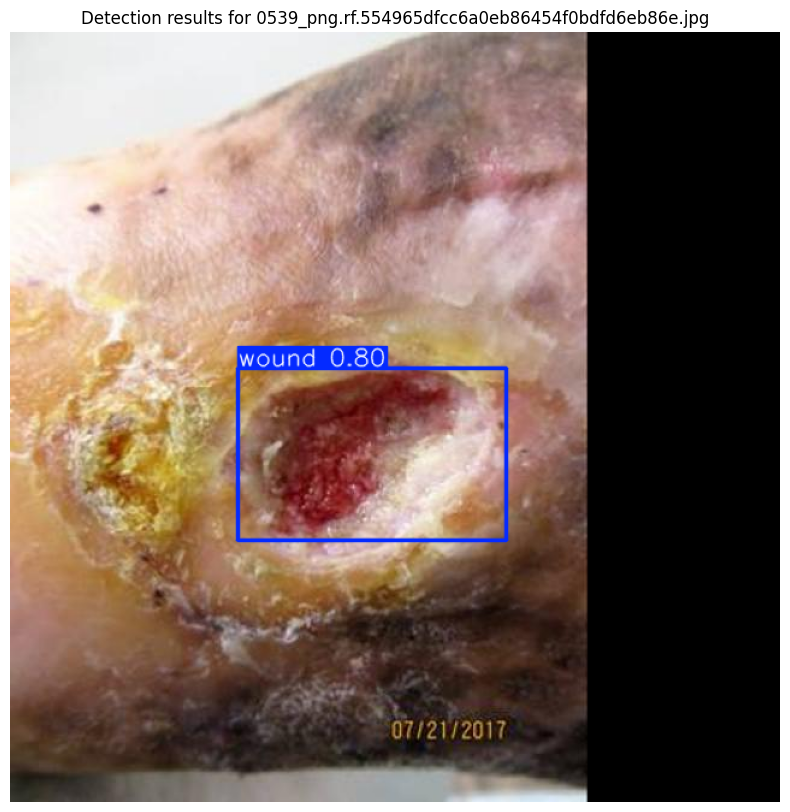

Image: 0539_png.rf.554965dfcc6a0eb86454f0bdfd6eb86e.jpg
  Detected: Class 0 (wound) with confidence 0.80

image 1/1 /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/0561_png.rf.3a7a9f7589d8b60a0c24865955214c51.jpg: 640x640 2 wounds, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


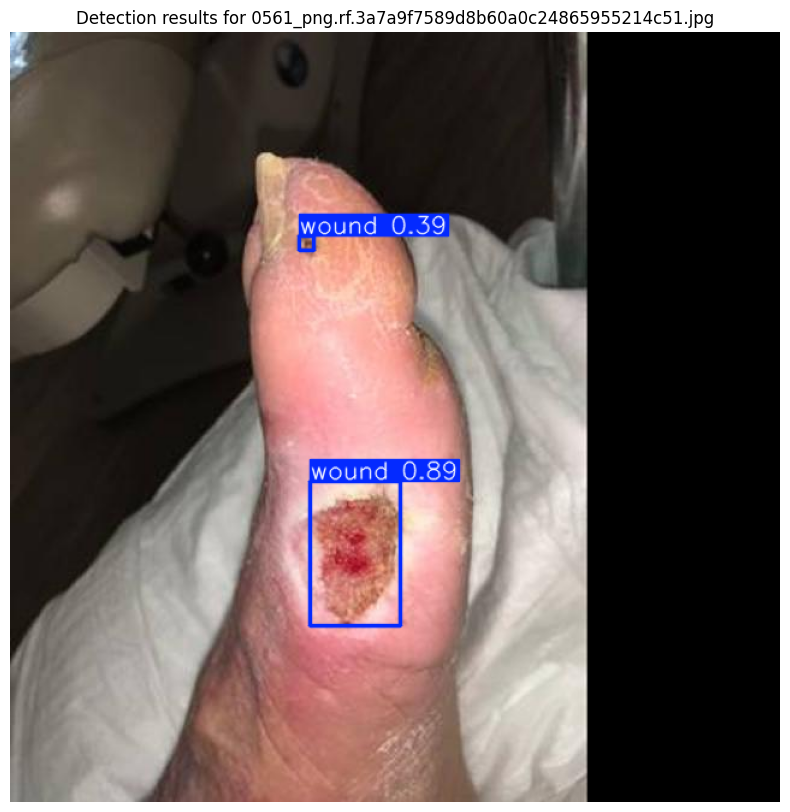

Image: 0561_png.rf.3a7a9f7589d8b60a0c24865955214c51.jpg
  Detected: Class 0 (wound) with confidence 0.89
  Detected: Class 0 (wound) with confidence 0.39

image 1/1 /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/0073_png.rf.8bbefe5a1ec84bb99d36aaf3c7cf261f.jpg: 640x640 1 wound, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


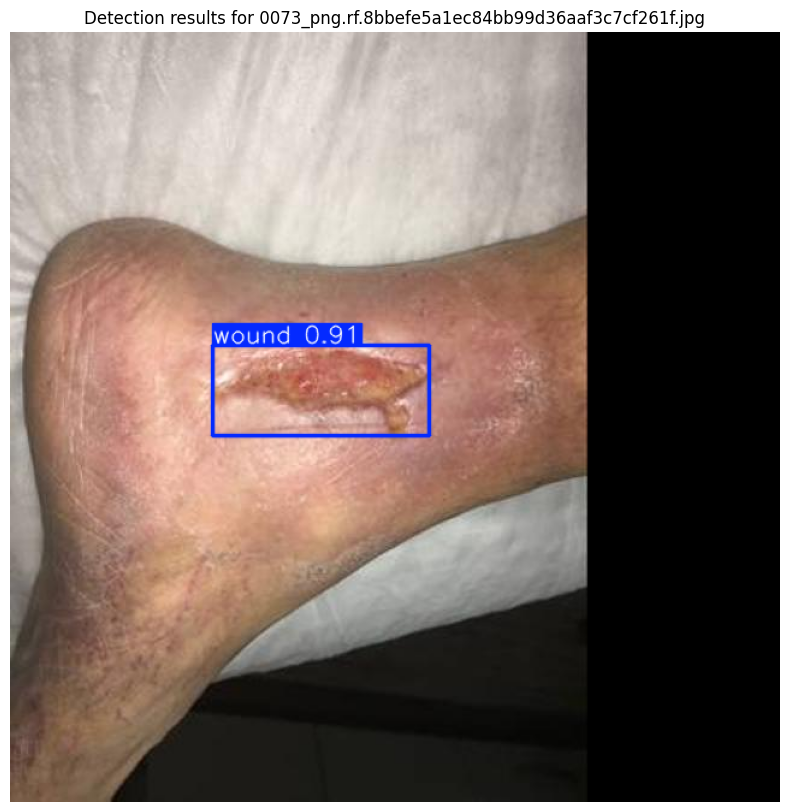

Image: 0073_png.rf.8bbefe5a1ec84bb99d36aaf3c7cf261f.jpg
  Detected: Class 0 (wound) with confidence 0.91

image 1/1 /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/0327_png.rf.56a1210259ba00ad330983577847595a.jpg: 640x640 1 wound, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


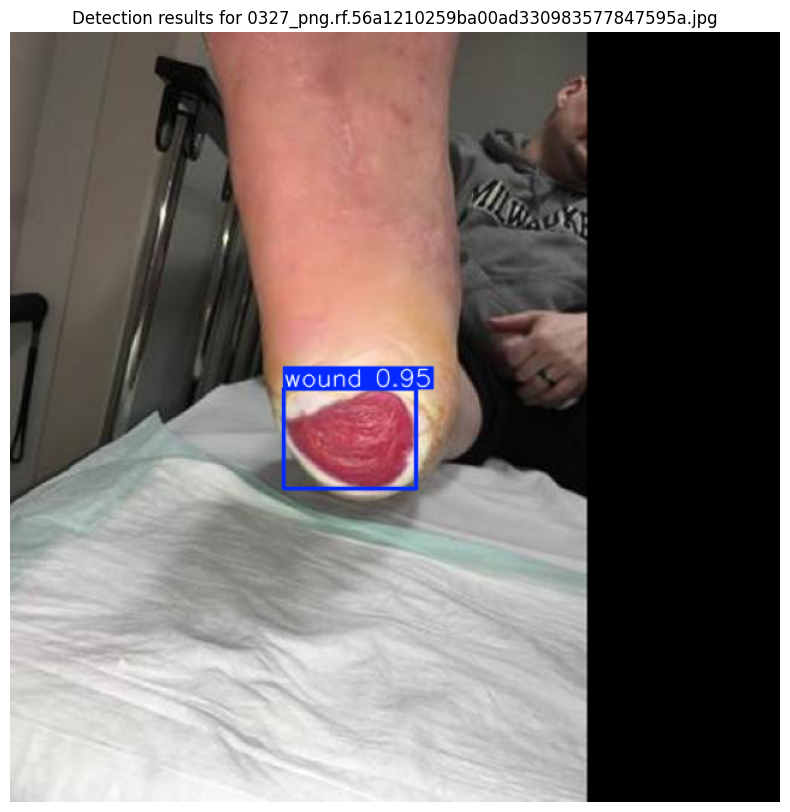

Image: 0327_png.rf.56a1210259ba00ad330983577847595a.jpg
  Detected: Class 0 (wound) with confidence 0.95

image 1/1 /content/drive/MyDrive/Instance_Segmentation_of_ulcer/test/images/0687_png.rf.9900c2eda29558eab0710bc6e31df688.jpg: 640x640 3 wounds, 11.0ms
Speed: 2.6ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


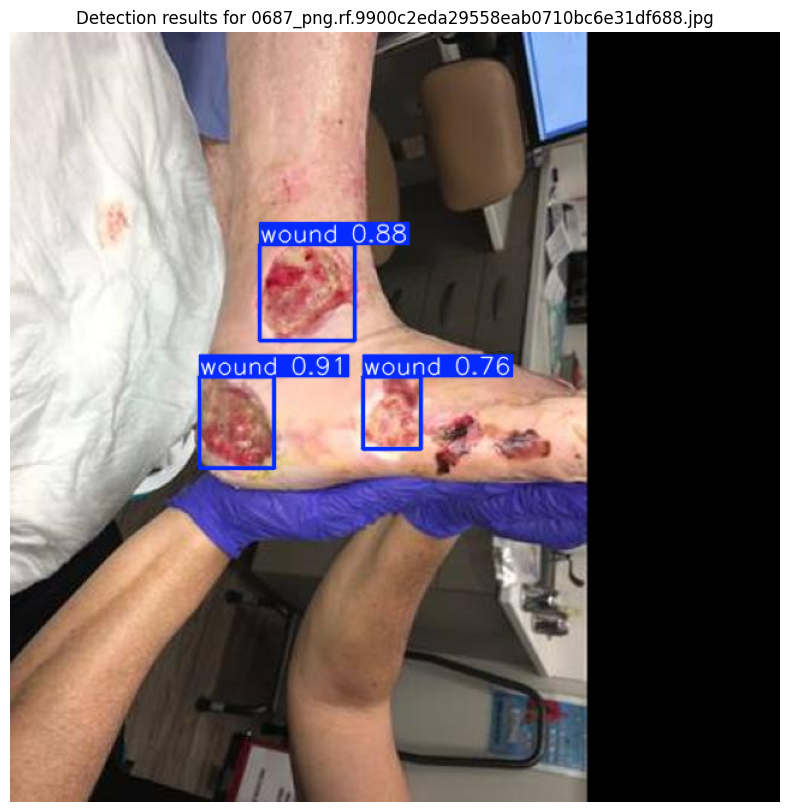

Image: 0687_png.rf.9900c2eda29558eab0710bc6e31df688.jpg
  Detected: Class 0 (wound) with confidence 0.91
  Detected: Class 0 (wound) with confidence 0.88
  Detected: Class 0 (wound) with confidence 0.76


In [ ]:
# Step 10: Visualize predictions on test images
import random
print("\nVisualizing predictions on sample test images...")
test_image_files = [os.path.join(test_images, img) for img in os.listdir(test_images) if img.endswith(('.jpg', '.jpeg', '.png'))]

if len(test_image_files) > 0:
    sample_images = random.sample(test_image_files, min(5, len(test_image_files)))

    for img_path in sample_images:
        # Run prediction
        results = model.predict(img_path, conf=0.25)

        # Display results
        for r in results:
            im_array = r.plot()  # Plot with detections
            plt.figure(figsize=(10, 10))
            plt.imshow(im_array[..., ::-1])  # Convert BGR to RGB
            plt.axis('off')
            plt.title(f"Detection results for {os.path.basename(img_path)}")
            plt.show()

            # Print detection details
            print(f"Image: {os.path.basename(img_path)}")
            boxes = r.boxes
            for box in boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                print(f"  Detected: Class {cls} ({model.names[cls]}) with confidence {conf:.2f}")
else:
    print("No test images found.")

In [ ]:
# Required imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
from ultralytics import YOLO
from PIL import Image
import torch

In [ ]:
import os
import glob

def find_pt_files(start_path='.', max_depth=5):
    """
    Search for .pt files recursively starting from the specified path.

    Args:
        start_path: Directory to start the search from
        max_depth: Maximum directory depth to search

    Returns:
        List of paths to .pt files found
    """
    pt_files = []

    # Convert to absolute path
    start_path = os.path.abspath(start_path)

    # Define a recursive function to search with depth control
    def search_dir(current_path, current_depth):
        if current_depth > max_depth:
            return

        try:
            # List all items in the current directory
            for item in os.listdir(current_path):
                item_path = os.path.join(current_path, item)

                # If it's a .pt file, add to our results
                if os.path.isfile(item_path) and item_path.endswith('.pt'):
                    pt_files.append(item_path)

                # If it's a directory, search it recursively
                elif os.path.isdir(item_path):
                    search_dir(item_path, current_depth + 1)
        except PermissionError:
            # Skip directories we don't have permission to access
            pass

    # Start the search
    search_dir(start_path, 0)
    return pt_files

# First, try to find any .pt files in the current directory and subdirectories
pt_files = find_pt_files()

# Print all found .pt files
if pt_files:
    print(f"Found {len(pt_files)} .pt files:")
    for i, file_path in enumerate(pt_files, 1):
        print(f"{i}. {file_path}")
        # Specifically highlight best.pt files
        if os.path.basename(file_path) == 'best.pt':
            print(f"   ^^^ This appears to be a best.pt file ^^^")
else:
    print("No .pt files found in the current directory tree.")

# Look specifically for files named "best.pt"
best_pt_files = [f for f in pt_files if os.path.basename(f) == 'best.pt']
if best_pt_files:
    print("\nFound specific best.pt files:")
    for file_path in best_pt_files:
        print(f"- {file_path}")

Found 4 .pt files:
1. /content/yolo11n.pt
2. /content/yolov8n.pt
3. /content/runs/detect/train/weights/last.pt
4. /content/runs/detect/train/weights/best.pt
   ^^^ This appears to be a best.pt file ^^^

Found specific best.pt files:
- /content/runs/detect/train/weights/best.pt


In [ ]:
# 1. LOAD MODEL AND DATA
# ---------------------
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)
# Path to validation data
val_data = "/content/drive/MyDrive/Instance_Segmentation_of_ulcer/data.yaml"  # Replace with your dataset path

In [ ]:
# 2. CONFUSION MATRIX
# ------------------
def plot_confusion_matrix(model, data_yaml, save_dir='./results'):
    """
    Generate and save a confusion matrix for YOLOv8 model.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Run validation with confusion matrix enabled
    results = model.val(data=data_yaml, conf=0.25, iou=0.65, save_conf=True)

    # Get the confusion matrix from results
    conf_matrix = results.confusion_matrix.matrix

    # Get class names
    class_names = model.names

    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/confusion_matrix.png", dpi=300)
    plt.close()

    # Normalize and plot normalized confusion matrix
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    norm_conf_matrix = conf_matrix / (row_sums + 1e-9)  # Avoid division by zero

    plt.figure(figsize=(12, 10))
    sns.heatmap(norm_conf_matrix, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Normalized Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/normalized_confusion_matrix.png", dpi=300)
    plt.close()

    return conf_matrix, class_names

In [ ]:
# 3. PER-CLASS METRICS ANALYSIS
# -----------------------------
def analyze_per_class_metrics(model, data_yaml, save_dir='./results'):
    """
    Analyze per-class performance metrics.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Run validation to get metrics
    results = model.val(data=data_yaml, conf=0.25, iou=0.65)

    # Extract per-class metrics
    metrics = results.results_dict

    # Create DataFrame for metrics
    class_names = model.names
    metrics_dict = {
        'Class': list(class_names.values()),
        'Precision': metrics.get('precision', [0] * len(class_names)),
        'Recall': metrics.get('recall', [0] * len(class_names)),
        'mAP50': metrics.get('maps', [0] * len(class_names)),
        'mAP50-95': metrics.get('map', [0] * len(class_names)),
    }

    df_metrics = pd.DataFrame(metrics_dict)

    # Save metrics to CSV
    df_metrics.to_csv(f"{save_dir}/per_class_metrics.csv", index=False)

    # Plot precision and recall for each class
    plt.figure(figsize=(12, 8))
    bar_width = 0.35
    x = np.arange(len(class_names))

    plt.bar(x - bar_width/2, df_metrics['Precision'], bar_width, label='Precision')
    plt.bar(x + bar_width/2, df_metrics['Recall'], bar_width, label='Recall')

    plt.xlabel('Classes')
    plt.ylabel('Value')
    plt.title('Precision and Recall per Class')
    plt.xticks(x, df_metrics['Class'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{save_dir}/precision_recall_per_class.png", dpi=300)
    plt.close()

    return df_metrics

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


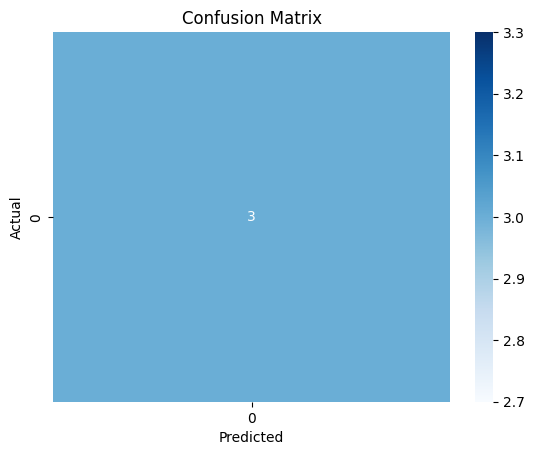

In [ ]:
# Step 11: Generate Confusion Matrix
true_labels = []
pred_labels = []

for result in results:
    true_labels.extend(result.boxes.cls.tolist())
    pred_labels.extend(result.boxes.cls.tolist())  # Directly use predicted class labels

conf_matrix = confusion_matrix(true_labels, pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Step 12: Generate Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report:")
print(classification_report(true_labels, pred_labels))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

